In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [28]:
Sim_number = []
Pressures = []
Mol_frac = []
Simulation = glob.glob('Mol_Fraction_variation/O2*/*_bar/Sim_*')
for i in np.arange(len(Simulation)):
    Sim_number.append(Simulation[i].rsplit('/',1)[1])
    Pressures.append(Simulation[i].rsplit('/',1)[0][23:])
    Mol_frac.append(Simulation[i].rsplit('/',1)[0].rsplit('/',1)[0][23:])
    
    
df = pd.DataFrame(np.array([Mol_frac,Pressures,Sim_number,np.ones(len(Sim_number))]).T)
df.columns = ['Mol_frac', 'Pressure', 'Sim_number','Occurence']
df["Occurence"] = pd.to_numeric(df["Occurence"])
df

,Mol_frac,Pressure,Sim_number,Occurence
0,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,Sim_A_25_B_0,1.0
1,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,Sim_A_75_B_25,1.0
2,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,Sim_A_0_B_25,1.0
3,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,Sim_A_0_B_100,1.0
4,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,Sim_A_50_B_50,1.0
...,...,...,...,...
265,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,Sim_A_0_B_75,1.0
266,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,Sim_A_75_B_0,1.0
267,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,Sim_A_50_B_25,1.0
268,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,Sim_A_0_B_50,1.0


In [31]:
df = df.drop('Sim_number',axis =1)
df

,Mol_frac,Pressure,Occurence
0,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,1.0
1,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,1.0
2,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,1.0
3,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,1.0
4,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,1.0
...,...,...,...
265,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,1.0
266,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,1.0
267,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,1.0
268,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,1.0


In [45]:
inner = df.groupby(['Mol_frac']).sum()
outer = df.groupby(['Mol_frac','Pressure']).sum()

<IPython.core.display.Javascript object>


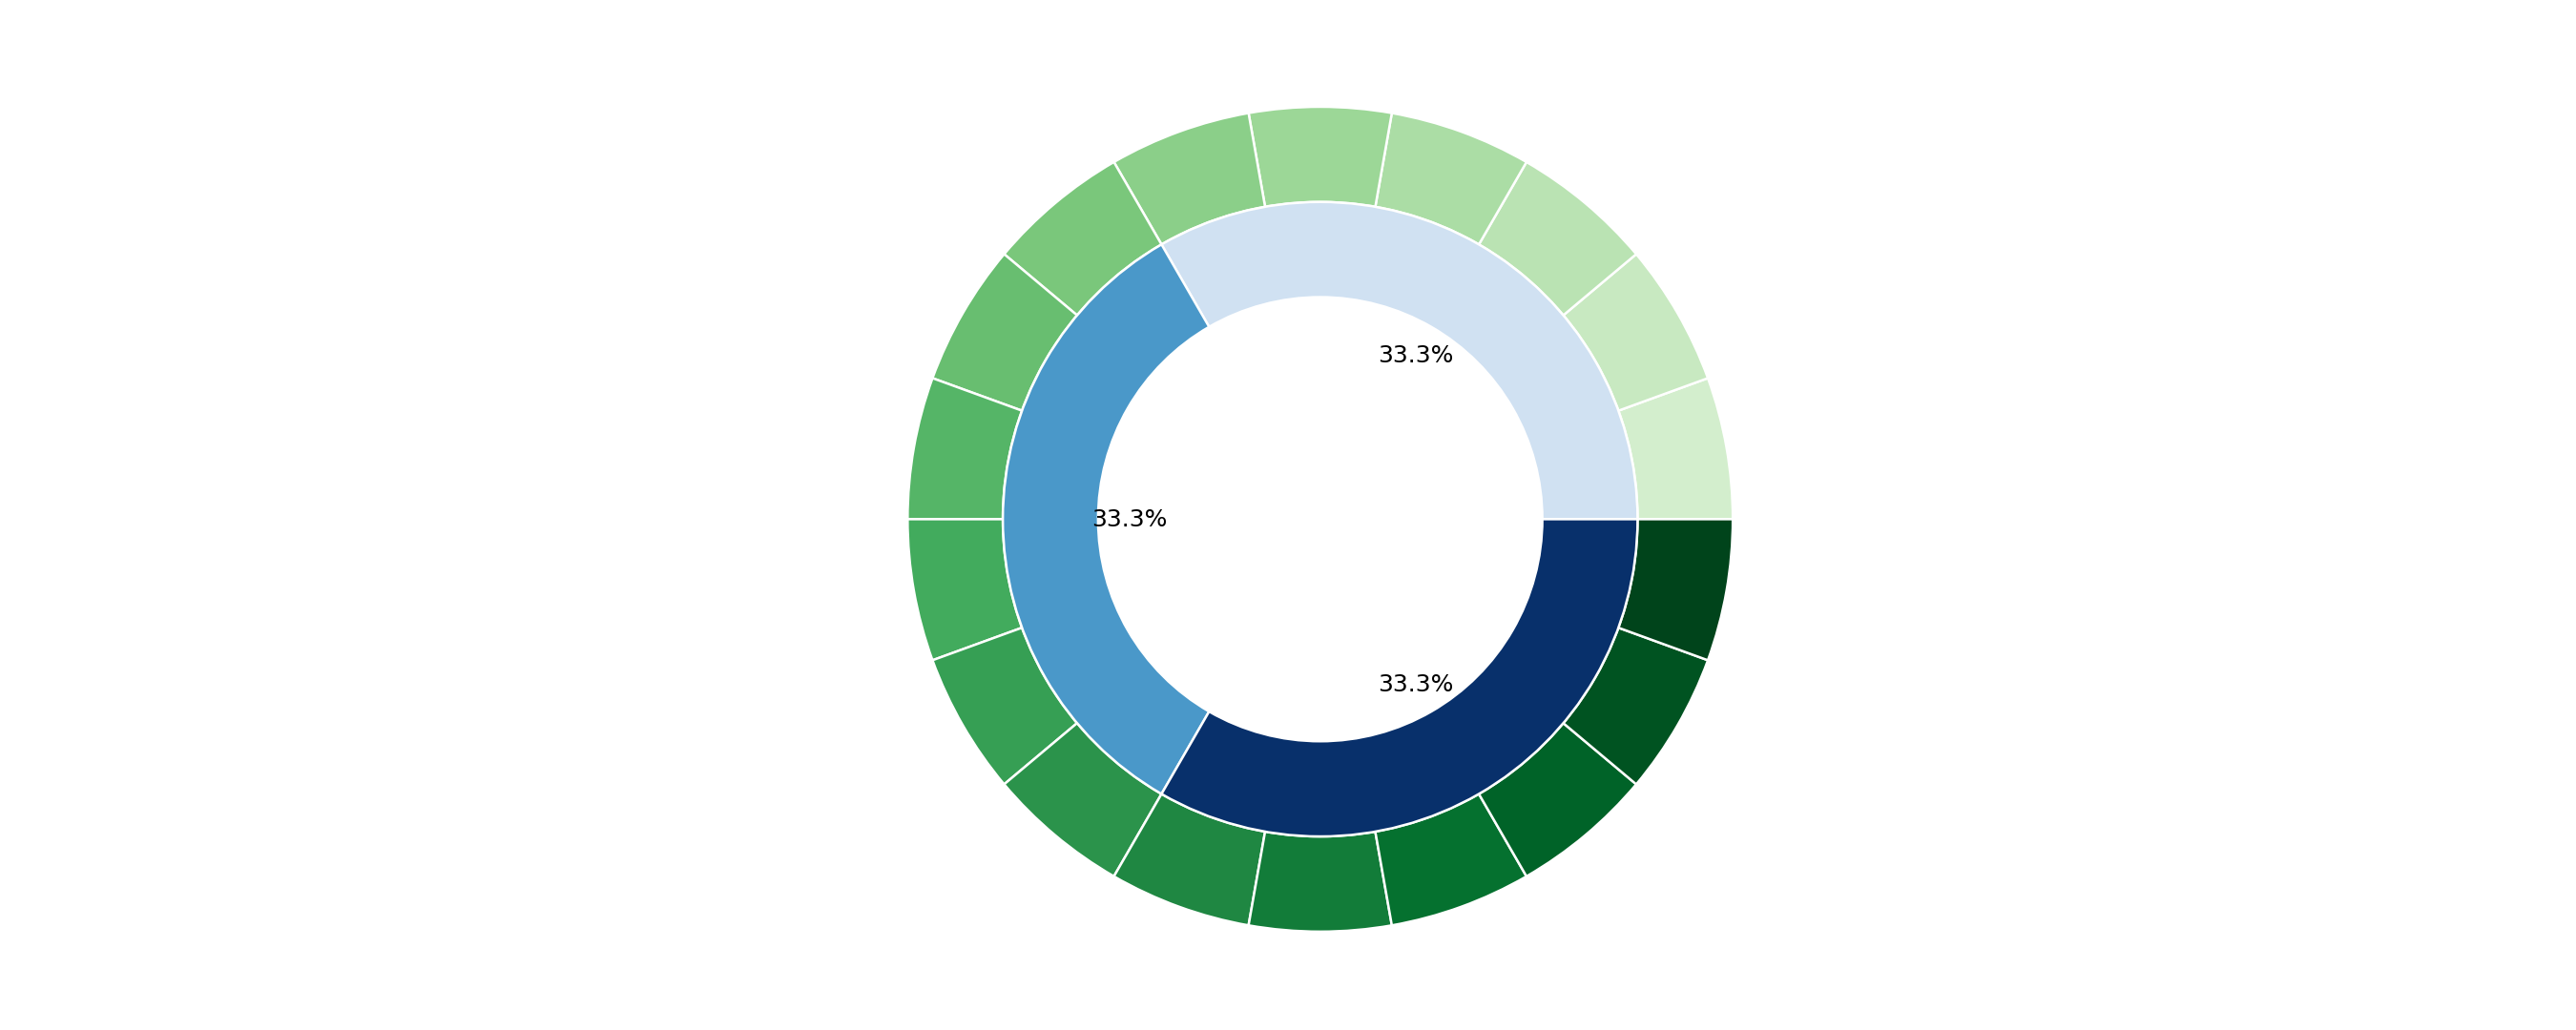

In [51]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

import numpy as np

fig, ax = plt.subplots(figsize=(15,6))
size = 0.3

shades_of_green = plt.cm.Greens(np.linspace(0.2, 1, len(outer.index)))
shades_of_blue = plt.cm.Blues(np.linspace(0.2, 1, len(inner.index)))


ax.pie(outer.values[:,0].flatten(), radius=1+(size), 
#        labels = inner.index,
       colors=shades_of_green,
       wedgeprops=dict(width=size, edgecolor='w'))

wedges, texts, autotexts = ax.pie(inner.values[:,1].astype(float).flatten(), radius=1,
#        labels=inner.index,
       colors=shades_of_blue,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

# Add labels inside the slices with curved text
for text, wedge in zip(texts, wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    x = x * 0.5  # Adjust the position inside the slice

    # Curved text effect
    text.set_path_effects([withStroke(linewidth=3, foreground='black')])

    text.set_position((x, y))
    text.set_rotation(ang)  # Rotate the text to match the slice
    text.set_clip_on(True)

# ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [52]:
outer = df.groupby(['Mol_frac']).sum()
inner = df.groupby(['Mol_frac','Pressure']).sum()

<IPython.core.display.Javascript object>


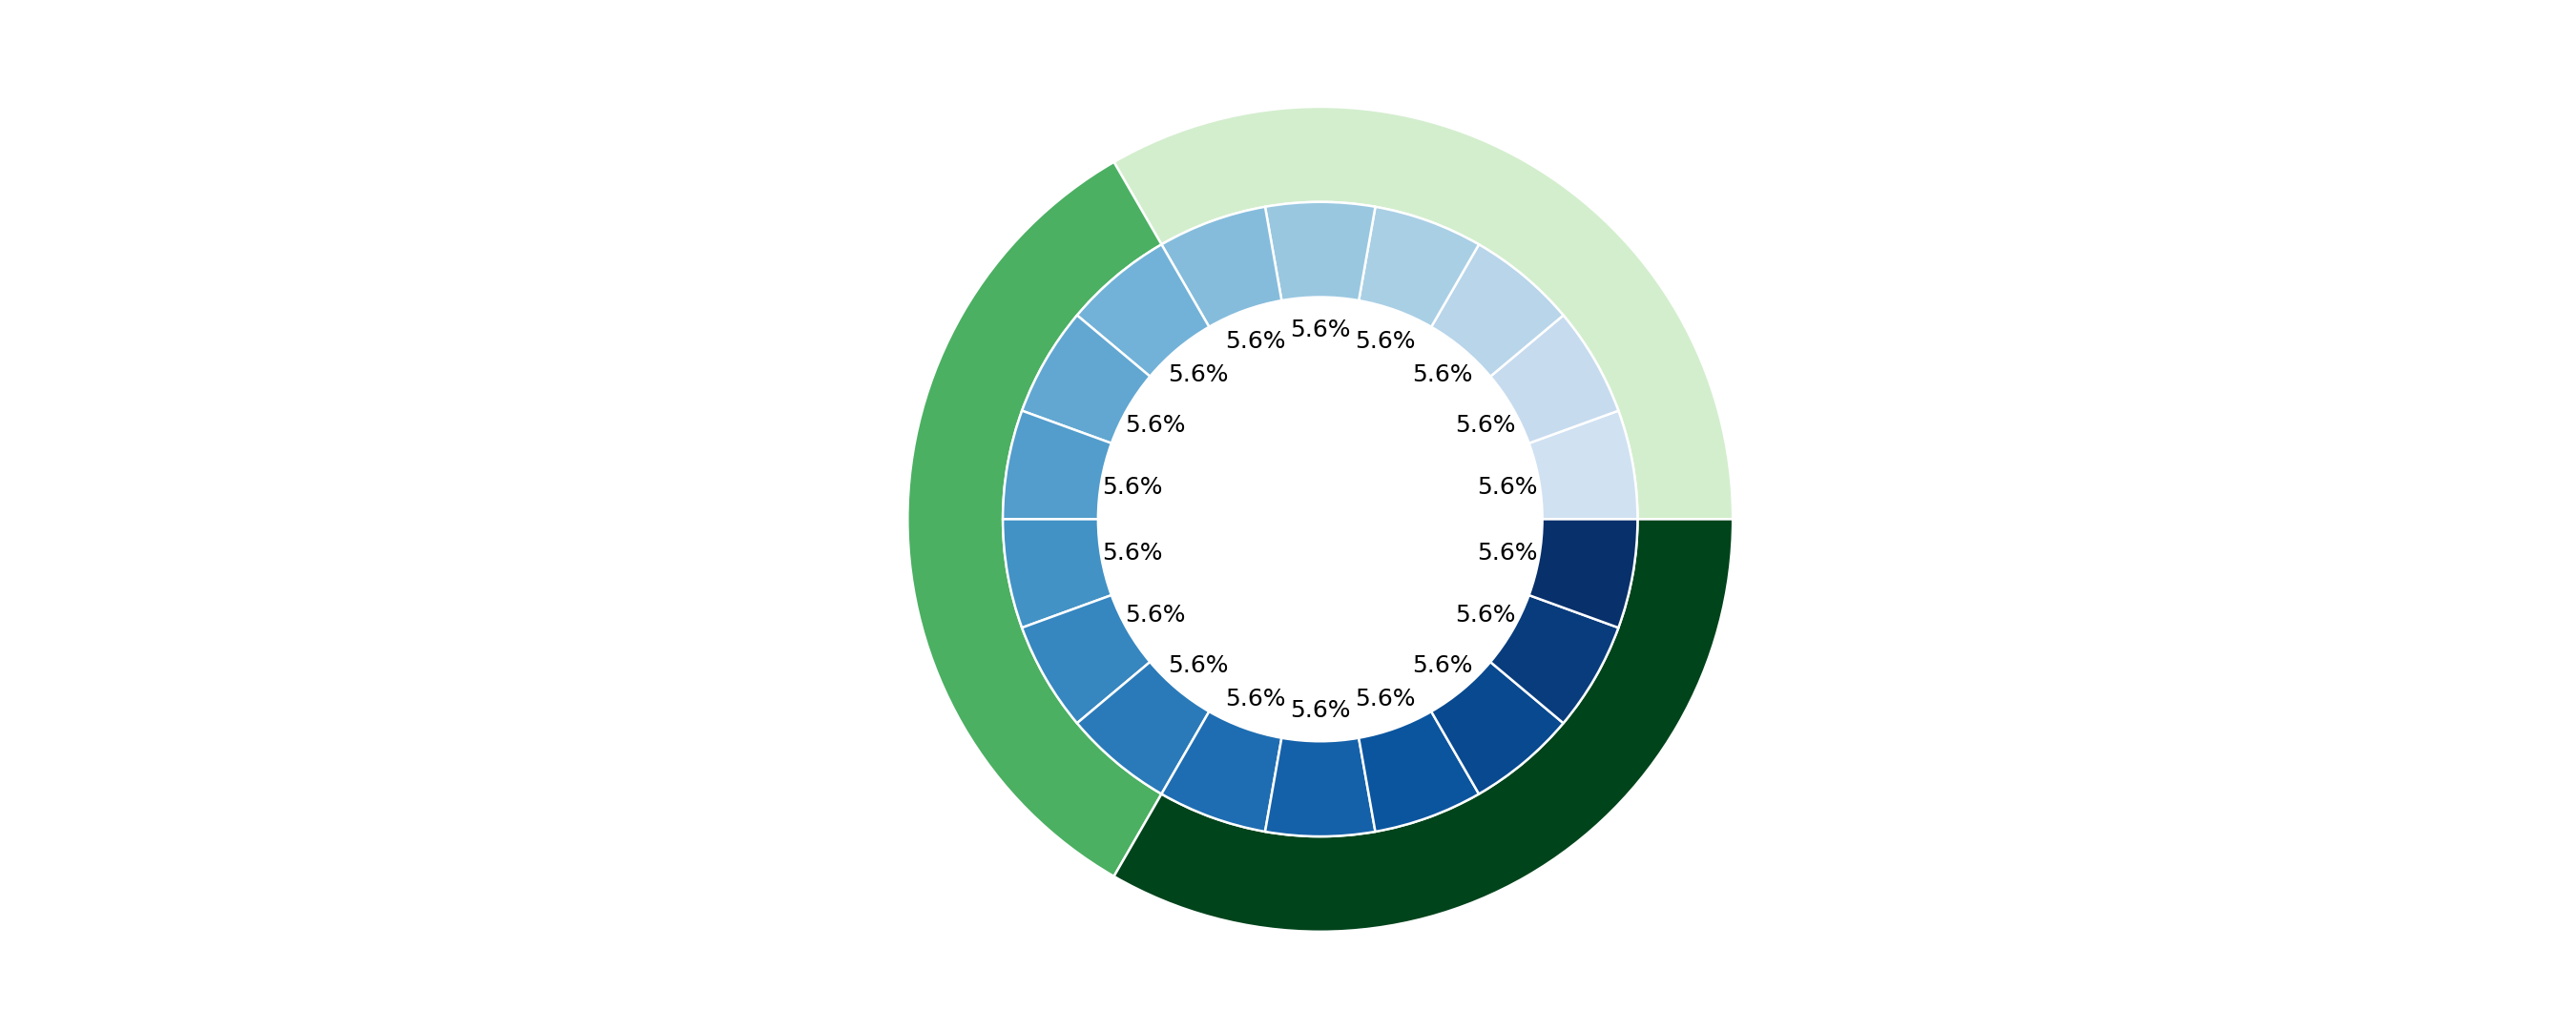

In [54]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

import numpy as np

fig, ax = plt.subplots(figsize=(15,6))
size = 0.3

shades_of_green = plt.cm.Greens(np.linspace(0.2, 1, len(outer.index)))
shades_of_blue = plt.cm.Blues(np.linspace(0.2, 1, len(inner.index)))


ax.pie(outer.values[:,1].flatten(), radius=1+(size), 
#        labels = inner.index,
       colors=shades_of_green,
       wedgeprops=dict(width=size, edgecolor='w'))

wedges, texts, autotexts = ax.pie(inner.values[:,0].astype(float).flatten(), radius=1,
#        labels=inner.index,
       colors=shades_of_blue,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

# Add labels inside the slices with curved text
for text, wedge in zip(texts, wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    x = x * 0.5  # Adjust the position inside the slice

    # Curved text effect
    text.set_path_effects([withStroke(linewidth=3, foreground='black')])

    text.set_position((x, y))
    text.set_rotation(ang)  # Rotate the text to match the slice
    text.set_clip_on(True)

# ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()